In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


import sys

sys.path.append('../')

from eda import utils

tracks = utils.load('../data/fma_metadata/tracks.csv')
features = utils.load('../data/fma_metadata/features.csv')

In [2]:
small = tracks['set', 'subset'] <= 'small'
X = features.loc[small]
y = tracks['track', 'genre_top'].loc[small]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


               precision    recall  f1-score   support

   Electronic       0.31      0.37      0.34       185
 Experimental       0.31      0.29      0.30       206
         Folk       0.44      0.43      0.43       208
      Hip-Hop       0.42      0.42      0.42       200
 Instrumental       0.41      0.39      0.40       203
International       0.38      0.38      0.38       205
          Pop       0.26      0.24      0.25       199
         Rock       0.41      0.43      0.42       194

     accuracy                           0.37      1600
    macro avg       0.37      0.37      0.37      1600
 weighted avg       0.37      0.37      0.37      1600



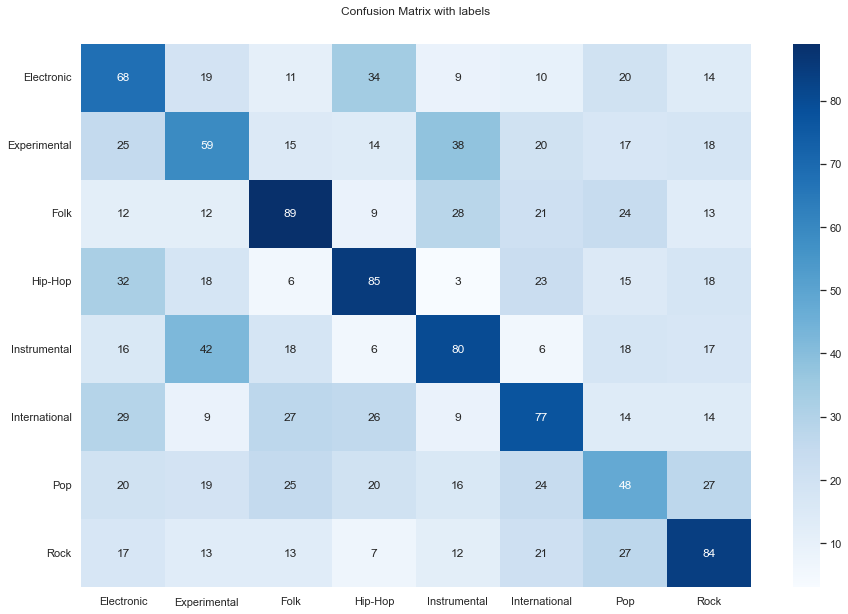

In [4]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(X=X_train, y=y_train)
y_pred = dtc.predict(X_test)

print(classification_report(y_test, y_pred))
cf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(dtc.classes_)
kwargs = {'rotation': 'horizontal'}
ax.set_yticklabels(dtc.classes_, **kwargs)

ax.set_title('Confusion Matrix with labels\n\n')

## Display the visualization of the Confusion Matrix.
plt.show()